In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
import math
import random

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.backend import clear_session

# from keras.models import Sequential
# from keras.layers import Dense, SimpleRNN, LSTM
# from keras.backend import clear_session

In [3]:
#random.seed(42)

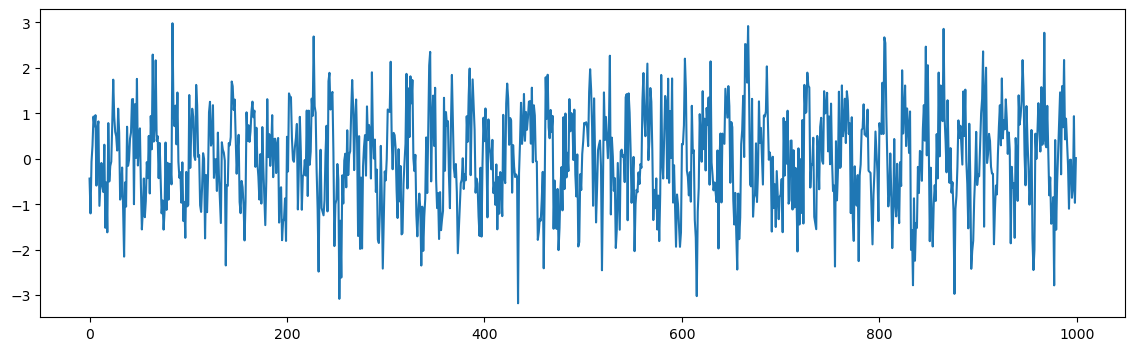

In [30]:
Fs = 100
f = 5

sample = 1000

X = np.arange(sample)
y = np.sin(2 * np.pi * f * X / Fs)

y = [i + np.random.randn() * 0.8 for i in y]

plt.figure(figsize=(14, 4))
plt.plot(X, y)
plt.show()

In [31]:
df = pd.DataFrame({'y': y})
df

,y
0,-0.434868
1,-1.200421
2,-0.063280
3,0.293191
4,0.928292
...,...
995,-0.857130
996,-0.647308
997,0.936547
998,-0.967764


In [32]:
scalar = MinMaxScaler(feature_range=(0, 1))

dataset = scalar.fit_transform(df)

In [33]:
train_size = int(len(dataset)*0.7)
test_size = len(dataset) - train_size

In [34]:
train = dataset[0:train_size, :]
test = dataset[train_size:len(dataset), :]

In [35]:
print(train_size), print(test_size)

700
300


(None, None)

In [36]:
len(train), len(test)

(700, 300)

In [37]:
train[100], test[100]

(array([0.35128355]), array([0.64333478]))

In [38]:
train.shape, test.shape

((700, 1), (300, 1))

In [39]:
len(train)

700

In [40]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:i+look_back, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 20
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

In [41]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:i+look_back, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Assuming 'train' and 'test' datasets are defined elsewhere
look_back = 20
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

In [42]:
X_train[0], X_train[1], X_train[2]

(array([0.44537104, 0.32099706, 0.50574031, 0.56365368, 0.6668341 ,
        0.63215559, 0.6718624 , 0.4203347 , 0.62631886, 0.64960154,
        0.34793608, 0.42054083, 0.50108934, 0.41758517, 0.39724241,
        0.56627498, 0.26949436, 0.43154301, 0.25338961, 0.64347224]),
 array([0.32099706, 0.50574031, 0.56365368, 0.6668341 , 0.63215559,
        0.6718624 , 0.4203347 , 0.62631886, 0.64960154, 0.34793608,
        0.42054083, 0.50108934, 0.41758517, 0.39724241, 0.56627498,
        0.26949436, 0.43154301, 0.25338961, 0.64347224, 0.43505597]),
 array([0.50574031, 0.56365368, 0.6668341 , 0.63215559, 0.6718624 ,
        0.4203347 , 0.62631886, 0.64960154, 0.34793608, 0.42054083,
        0.50108934, 0.41758517, 0.39724241, 0.56627498, 0.26949436,
        0.43154301, 0.25338961, 0.64347224, 0.43505597, 0.49029514]))

In [43]:
y_train[0], y_train[1]

(0.4350559670094414, 0.49029514109814004)

In [44]:
train[0:6]

array([[0.44537104],
       [0.32099706],
       [0.50574031],
       [0.56365368],
       [0.6668341 ],
       [0.63215559]])

In [53]:
dnn_model = Sequential()
dnn_model.add(Dense(16, activation='tanh'))
dnn_model.add(Dense(1))
dnn_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-1), 
              loss=tf.keras.losses.mean_squared_error,
              metrics=['accuracy'])
dnn_model.fit(X_train, y_train, epochs=50, verbose=0, batch_size=16)

In [54]:
# # Clear the Keras session
# clear_session()

# model = Sequential()
# model.add(Dense(16, activation='relu'))
# model.add(Dense(1))
# model.compile(loss="mean_squared_error", optimizer='adam')
# model.fit(X_train, y_train, epochs=50, verbose=0, batch_size=16)
print(dnn_model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                336       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 353 (1.38 KB)
Trainable params: 353 (1.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [55]:
type(X_test)

numpy.ndarray

In [56]:
X_test.shape, y_test.shape

((279, 20), (279,))

In [57]:
temp = np.array([X_test[0]])
temp

array([[0.38830011, 0.44365048, 0.25381506, 0.66184208, 0.45589365,
        0.64796774, 0.49863055, 0.68775734, 0.35578866, 0.36794915,
        0.58039389, 0.58149647, 0.3348552 , 0.54667259, 0.34236366,
        0.48361307, 0.39260502, 0.184945  , 0.5533119 , 0.28130667]])

1/1 [==============================] - 0s 8ms/step


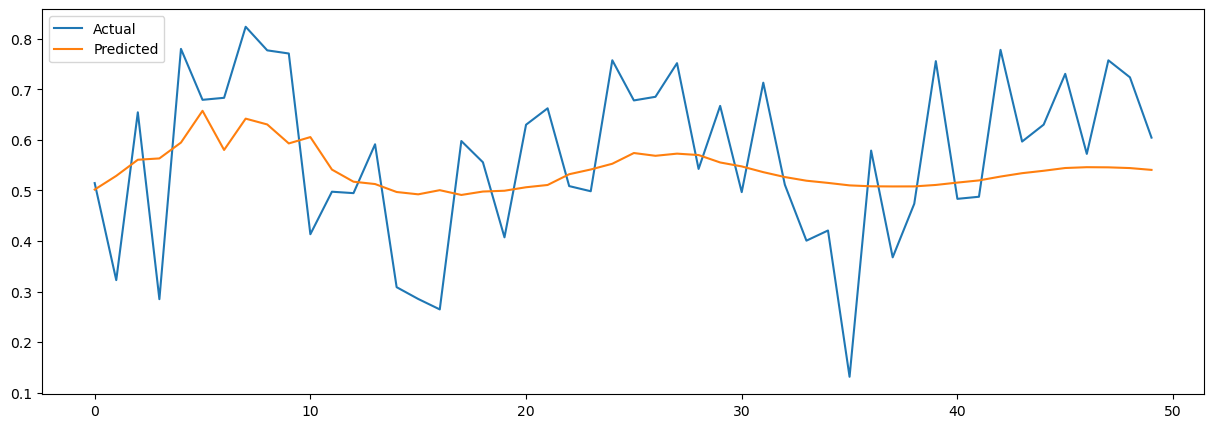

In [58]:
#plt.figure(figsize= (15, 5))
temp = X_test[0].reshape(1, look_back)
#temp = np.array([X_test[0]])
preds = []

for i in range(50):
    pred = dnn_model.predict(temp)[0][0]    
    preds.append(pred)
    temp = list(temp[0])
    temp.append(pred)
    temp = np.array([temp[1:]])

plt.figure(figsize = (15, 5))
plt.plot(y_test[:len(preds)])
plt.plot(preds)
plt.legend(['Actual', 'Predicted'])

1/1 [==============================] - 0s 9ms/step


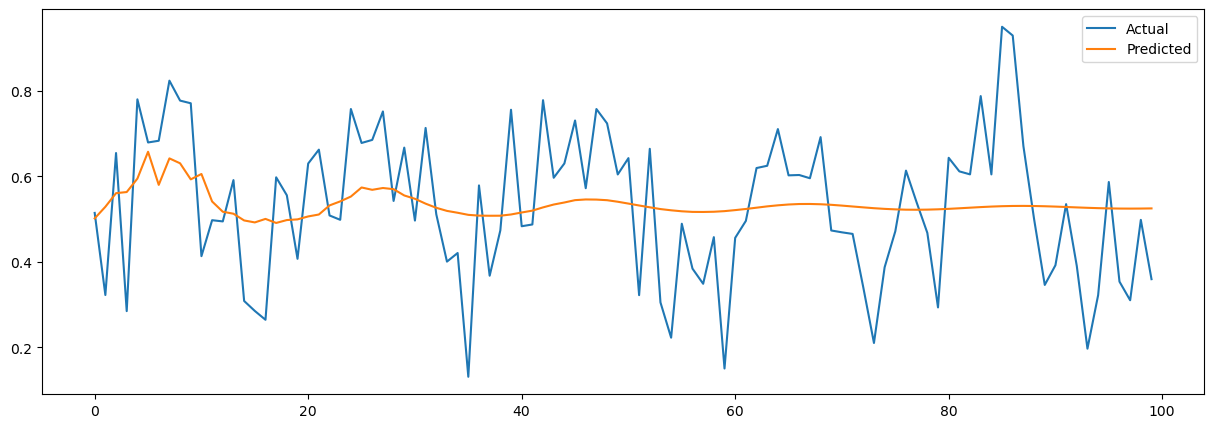

In [59]:
#plt.figure(figsize= (15, 5))
temp = X_test[0].reshape(1, look_back)
#temp = np.array([X_test[0]])
preds = []

for i in range(100):
    pred = dnn_model.predict(temp)[0][0]    
    preds.append(pred)
    temp = list(temp[0])
    temp.append(pred)
    temp = np.array([temp[1:]])

plt.figure(figsize = (15, 5))
plt.plot(y_test[:len(preds)])
plt.plot(preds)
plt.legend(['Actual', 'Predicted'])

1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step


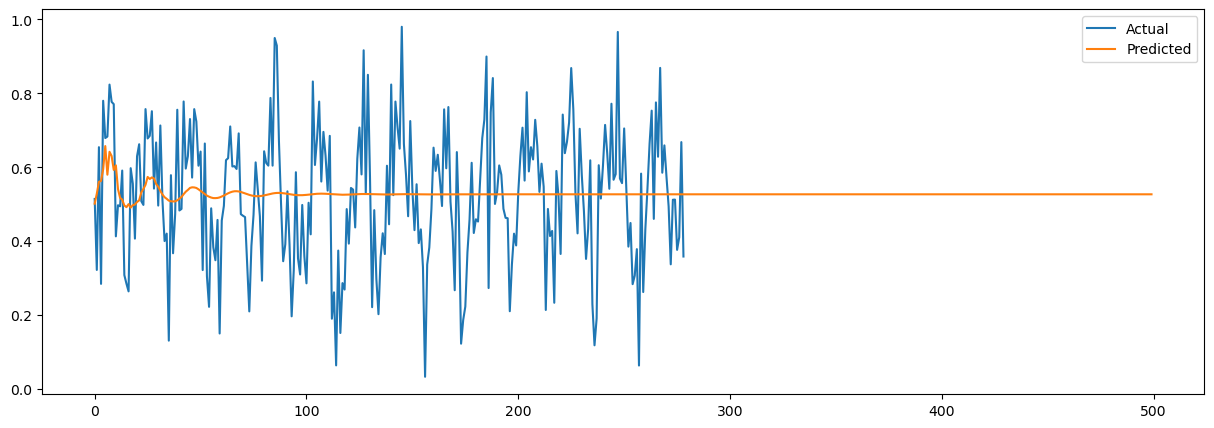

In [60]:
#plt.figure(figsize= (15, 5))
temp = X_test[0].reshape(1, look_back)
#temp = np.array([X_test[0]])
preds = []

for i in range(500):
    pred = dnn_model.predict(temp)[0][0]    
    preds.append(pred)
    temp = list(temp[0])
    temp.append(pred)
    temp = np.array([temp[1:]])

plt.figure(figsize = (15, 5))
plt.plot(y_test[:len(preds)])
plt.plot(preds)
plt.legend(['Actual', 'Predicted'])